# MSDS 422 Assignment 1: Exploring and Visualizing Data

**Survey background and objectives**<br>
As one of the first applied data science graduate programs, Northwestern’s MSPA (now MSDS) program established an early footing in training domain experts from a variety of academic and professional backgrounds for careers in data science across a variety of industries. However, the data science field is a rapidly-evolving domain and employer hiring demands, though growing, shift regularly according to both skills demands and the relevant technology space.

This survey aims to assess current students’ perception of the field’s needs with respect to programming and software skills; it also provides a snapshot of course completion progress for student respondents and interest in future program offerings. In conjunction with the input of an external advisory board of 30 industry leaders who commented on their data science capability needs in a 2-5 year period, these results form part of the ongoing effort to evaluate how well the program is meeting both student and market demands, training new data scientists sufficiently for the field. 

This report includes data preparation, exploration, and analysis of the survey data. Additionally, the feature for courses completed has been scaled two ways (standardization and normalization) for comparison and evaluation. The analysis below forms the basis of recommendations for future direction for the MSDS program with respect to overall curriculum and related software and systems.

# I. Data Preparation and Initial Inspection

In [53]:
# Import dependencies
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
from sklearn import preprocessing  # feature transformations 
%matplotlib inline

In [54]:
np.set_printoptions(precision=3)

In [55]:
# Read in comma-delimited text file, creating a pandas DataFrame object
# Note that IPAddress is formatted as an actual IP address
# But is actually a random-hash of the original IP address
survey = pd.read_csv('mspa-survey-data.csv')

In [56]:
# Use the RespondentID as label for the rows... the index of DataFrame
survey.set_index('RespondentID', drop = True, inplace = True)

In [57]:
# Show the column/variable names of the DataFrame
# Note that RespondentID is no longer present
print(survey.columns)

Index(['Personal_JavaScalaSpark', 'Personal_JavaScriptHTMLCSS',
       'Personal_Python', 'Personal_R', 'Personal_SAS',
       'Professional_JavaScalaSpark', 'Professional_JavaScriptHTMLCSS',
       'Professional_Python', 'Professional_R', 'Professional_SAS',
       'Industry_JavaScalaSpark', 'Industry_JavaScriptHTMLCSS',
       'Industry_Python', 'Industry_R', 'Industry_SAS',
       'Python_Course_Interest', 'Foundations_DE_Course_Interest',
       'Analytics_App_Course_Interest', 'Systems_Analysis_Course_Interest',
       'Courses_Completed', 'PREDICT400', 'PREDICT401', 'PREDICT410',
       'PREDICT411', 'PREDICT413', 'PREDICT420', 'PREDICT422', 'PREDICT450',
       'PREDICT451', 'PREDICT452', 'PREDICT453', 'PREDICT454', 'PREDICT455',
       'PREDICT456', 'PREDICT457', 'OtherPython', 'OtherR', 'OtherSAS',
       'Other', 'Graduate_Date'],
      dtype='object')


In [58]:
# Rename columns for simplicity
survey_df = survey.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

In [59]:
# Inspect first 5 rows of data with renamed columns
survey_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [60]:
# Inspect number of samples and features
# 207 rows, 40 features
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 40 columns):
My_Java                             207 non-null int64
My_JS                               207 non-null int64
My_Python                           207 non-null int64
My_R                                207 non-null int64
My_SAS                              207 non-null int64
Prof_Java                           207 non-null int64
Prof_JS                             207 non-null int64
Prof_Python                         207 non-null int64
Prof_R                              207 non-null int64
Prof_SAS                            207 non-null int64
Ind_Java                            207 non-null int64
Ind_JS                              207 non-null int64
Ind_Python                          207 non-null int64
Ind_R                               207 non-null int64
Ind_SAS                             207 non-null int64
Python_Course_Interest              206 non-null float64
Fo

In [61]:
# Define subset of survey response data to focus on software preferences
software_df = survey_df.iloc[: , 0:15]

In [62]:
# Inspect first 5 rows of software DataFrame
software_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


In [63]:
# Define subset of survey response data to focus on course completion
courses_df = survey_df.loc[:, 'PREDICT400':'Other']

In [64]:
# Inspect DataFrame
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 19 columns):
PREDICT400     163 non-null object
PREDICT401     171 non-null object
PREDICT410     145 non-null object
PREDICT411     113 non-null object
PREDICT413     59 non-null object
PREDICT420     127 non-null object
PREDICT422     48 non-null object
PREDICT450     17 non-null object
PREDICT451     7 non-null object
PREDICT452     13 non-null object
PREDICT453     11 non-null object
PREDICT454     5 non-null object
PREDICT455     30 non-null object
PREDICT456     6 non-null object
PREDICT457     4 non-null object
OtherPython    5 non-null object
OtherR         14 non-null object
OtherSAS       2 non-null object
Other          26 non-null object
dtypes: object(19)
memory usage: 32.3+ KB


In [65]:
# Define subset of survey response data to focus on course interests
interests_df = survey_df.loc[:, 'Python_Course_Interest':'Systems_Analysis_Course_Interest']

In [66]:
# Inspect DataFrame
interests_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 5135740122 to 5109806898
Data columns (total 4 columns):
Python_Course_Interest              206 non-null float64
Foundations_DE_Course_Interest      200 non-null float64
Analytics_App_Course_Interest       203 non-null float64
Systems_Analysis_Course_Interest    200 non-null float64
dtypes: float64(4)
memory usage: 8.1+ KB


In [67]:
# Evaluate null values across all features
survey_df.isna().sum()

My_Java                               0
My_JS                                 0
My_Python                             0
My_R                                  0
My_SAS                                0
Prof_Java                             0
Prof_JS                               0
Prof_Python                           0
Prof_R                                0
Prof_SAS                              0
Ind_Java                              0
Ind_JS                                0
Ind_Python                            0
Ind_R                                 0
Ind_SAS                               0
Python_Course_Interest                1
Foundations_DE_Course_Interest        7
Analytics_App_Course_Interest         4
Systems_Analysis_Course_Interest      7
Courses_Completed                    20
PREDICT400                           44
PREDICT401                           36
PREDICT410                           62
PREDICT411                           94
PREDICT413                          148


In [68]:
# Compute descriptive statistics for numeric features for all data
survey_df.describe()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


In [69]:
# Compute descriptive statistics for software preference features
print('\nDescriptive statistics for software preferences\n----------------------------------------')
print(software_df.describe())


Descriptive statistics for software preferences
----------------------------------------
          My_Java       My_JS   My_Python        My_R      My_SAS   Prof_Java  \
count  207.000000  207.000000  207.000000  207.000000  207.000000  207.000000   
mean    10.135266    4.797101   31.304348   37.125604   16.637681    9.251208   
std     11.383477    6.757764   15.570982   14.576003   13.626400   13.167505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   20.000000   30.000000    5.000000    0.000000   
50%      9.000000    0.000000   30.000000   35.000000   15.000000    5.000000   
75%     20.000000   10.000000   40.000000   50.000000   25.000000   15.000000   
max     70.000000   30.000000   90.000000  100.000000   75.000000   80.000000   

          Prof_JS  Prof_Python      Prof_R    Prof_SAS    Ind_Java  \
count  207.000000   207.000000  207.000000  207.000000  207.000000   
mean     5.840580    30.028986   36.4154

In [70]:
# Compute descriptive statistics for course completion variable
print('\nDescriptive statistics for courses completed\n----------------------------------------')
print(survey_df['Courses_Completed'].describe())


Descriptive statistics for courses completed
----------------------------------------
count    187.000000
mean       6.342246
std        3.170849
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Courses_Completed, dtype: float64


In [71]:
# Calculate counts for courses completed
# Note that the totals below do not equal the 187 courses completed from question above
print('\nCounts for individual courses completed\n----------------------------------------')
print(courses_df.count())


Counts for individual courses completed
----------------------------------------
PREDICT400     163
PREDICT401     171
PREDICT410     145
PREDICT411     113
PREDICT413      59
PREDICT420     127
PREDICT422      48
PREDICT450      17
PREDICT451       7
PREDICT452      13
PREDICT453      11
PREDICT454       5
PREDICT455      30
PREDICT456       6
PREDICT457       4
OtherPython      5
OtherR          14
OtherSAS         2
Other           26
dtype: int64


In [72]:
# Calculate counts for graduation date by quarter
print('\nCounts for expected graduation date\n----------------------------------------')
print(survey_df['Graduate_Date'].value_counts())


Counts for expected graduation date
----------------------------------------
Spring 2018      30
Winter 2017      25
Winter 2018      25
Fall 2018        20
Spring 2017      19
Fall 2017        14
Summer 2017      14
Fall 2016        13
Winter 2019      11
Summer 2018      11
Spring 2019       9
Fall 2019         5
2020 or Later     5
Summer 2019       3
Name: Graduate_Date, dtype: int64


# II. Data Exploration: Expected Graduation Data 
Survey respondents are split across expected graduation years as follows (with 3 null values from 207 responses):
- 2016: 13
- 2017: 72
- 2018: 86
- 2019: 28
- 2020 or later: 5

This suggests that the majority of respondents have at least a year more of coursework at the time of survey administration. Expected graduation dates do change with circumstance, but this gives an idea of the perspective on timing and opportunities remaining amongst respondents.

**Figure 1: Expected Graduation Date Counts**

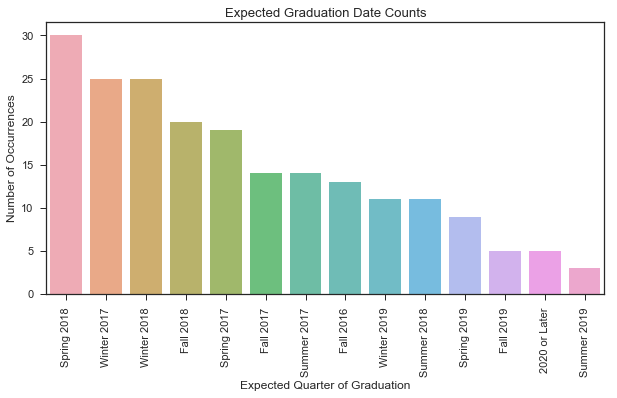

In [73]:
# Create barplot of graduation date counts
grad_count = survey_df['Graduate_Date'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(grad_count.index, grad_count.values, alpha=0.8)
plt.title('Expected Graduation Date Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Expected Quarter of Graduation', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# III. Data Exploration: Course Completion Data
The survey results show a discrepancy between total courses completed across respondents (1186 total from “Courses Completed” question 13 versus 966 total across the individual courses listed in question 14). This could be a result of respondents not rigorously including any course not listed in the numerous PREDICT options and "Other" options into the final "Other" category.

**Figure 2a: Completed Course Counts by Individual Courses (Question 14)**

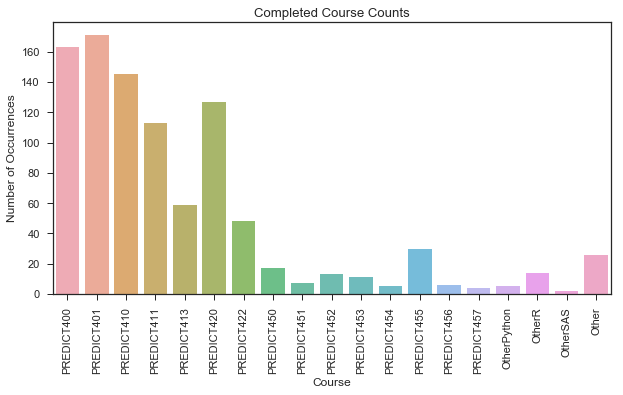

In [74]:
# Create barplot of courses completed by survey respondents by Fall 2016
# Note that totals from these values, cumulatively, do not equal the total values of Figure 2b below
course_count = courses_df.count()

plt.figure(figsize=(10,5))
sns.barplot(course_count.index, course_count.values, alpha=0.8)
plt.title('Completed Course Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Course', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Figure 2b: Completed Course Counts by Total Courses (Question 13)**

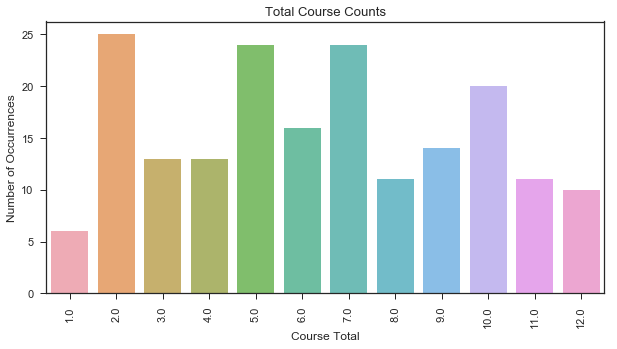

In [75]:
# Create barplot of graduation date counts
total_course_count = survey_df['Courses_Completed'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(total_course_count.index, total_course_count.values, alpha=0.8)
plt.title('Total Course Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Course Total', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Data scaling and comparisons for course completion variable

**Scaling methods and feature selection**<br>
Feature scaling is a useful transformation for numerical attributes having different scales, for example in a survey where one attribute may measure an interest score out of 100 and another may request a rating from 0 to 5. This transformation enables better performance with machine learning algorithms so that features can be compared more systematically. Min-Max scaling (also called normalization) and standardization and  are two common methods to transform data to have the same scale. Min-Max scaling shift values so their range ends up on a 0 to 1 scale. Standardization subtracts the mean value and divides by the standard deviation to provide unit variance for the resulting distribution.<br>
<br>
These two methods are applied to the Courses Completed feature, which asks for an integer of number of courses completed to date at time of survey response (though for further implementation of machine learning algorithms, all numeric attributes would likely be scaled to enable better comparison). Additionally, a natural log transformation with NumPy is applied to examine effects.<br>
<br>
Figures 3a and 3b below show a visual point of comparison of the impact of transformation on this feature. Unscaled, the values range from 1 to 12. Applying the standard scaler, the values range from -1.689323 (1 class) to 1.789093 (12 classes). Applying the MinMax scaler, the values range from 0 to 1, as with all normalization. The natural log transformation results in values ranging from 0 to 2.484907. The natural log transformation, one approach for dealing with skewed data in an attempt to make values conform more closely to the normal distribution, results in a left skew with this attribute. My recommendation for this attribute would be to use the MinMax scaler since its sensitivity to outliers (not present) would not be an issue. Across all attributes for the survey data, an assessment of outliers would be needed to make the call. Additional methods, like scikit-learn's MaxAbs scaler, may also be considered.
<br>
<br>
*Reference: Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O’Reilly.*<br>
<br>
*scikit-learn preprocessing documentation:https://scikit-learn.org/stable/modules/preprocessing.html*

In [76]:
# Select variable to examine, eliminating missing data codes
# Data preparation
X = survey_df['Courses_Completed'].dropna()
pd.Series(X).array
X

RespondentID
5133300037     6.0
5132253300     4.0
5132096630     7.0
5131990362     7.0
5131860849     5.0
              ... 
5109972944    10.0
5109962530     6.0
5109927686     3.0
5109817376     5.0
5109806898     7.0
Name: Courses_Completed, Length: 187, dtype: float64

In [77]:
# Standardization of Courses Completed feature
scaler = preprocessing.StandardScaler()
X_transformed_standard = scaler.fit_transform(X[:, np.newaxis])

In [78]:
# Inspect transformed values
X_transformed_standard

array([[-0.108],
       [-0.741],
       [ 0.208],
       [ 0.208],
       [-0.424],
       [ 1.473],
       [-1.373],
       [-1.057],
       [-0.108],
       [-1.057],
       [-1.373],
       [ 0.208],
       [-1.057],
       [-0.741],
       [-1.373],
       [ 1.789],
       [ 0.208],
       [-0.424],
       [-0.108],
       [ 0.524],
       [ 1.789],
       [ 0.84 ],
       [ 1.789],
       [-1.373],
       [-1.057],
       [-0.424],
       [ 0.208],
       [-1.373],
       [ 0.84 ],
       [ 0.208],
       [ 0.208],
       [ 0.208],
       [-1.689],
       [-0.424],
       [-0.424],
       [ 1.473],
       [-0.424],
       [-0.108],
       [ 1.157],
       [-0.108],
       [ 0.84 ],
       [ 1.157],
       [-0.741],
       [-0.741],
       [ 0.208],
       [-0.424],
       [-1.057],
       [ 0.208],
       [ 1.157],
       [ 0.208],
       [-0.108],
       [-0.424],
       [-0.424],
       [-1.057],
       [-0.108],
       [ 0.208],
       [-0.108],
       [ 0.524],
       [ 1.157

In [79]:
# Normalization of Courses Completed feature with MinMax scaling
scaler = preprocessing.MinMaxScaler()
X_transformed_minmax = scaler.fit_transform(X[:, np.newaxis])

In [80]:
# Inspect transformed values
X_transformed_minmax

array([[0.455],
       [0.273],
       [0.545],
       [0.545],
       [0.364],
       [0.909],
       [0.091],
       [0.182],
       [0.455],
       [0.182],
       [0.091],
       [0.545],
       [0.182],
       [0.273],
       [0.091],
       [1.   ],
       [0.545],
       [0.364],
       [0.455],
       [0.636],
       [1.   ],
       [0.727],
       [1.   ],
       [0.091],
       [0.182],
       [0.364],
       [0.545],
       [0.091],
       [0.727],
       [0.545],
       [0.545],
       [0.545],
       [0.   ],
       [0.364],
       [0.364],
       [0.909],
       [0.364],
       [0.455],
       [0.818],
       [0.455],
       [0.727],
       [0.818],
       [0.273],
       [0.273],
       [0.545],
       [0.364],
       [0.182],
       [0.545],
       [0.818],
       [0.545],
       [0.455],
       [0.364],
       [0.364],
       [0.182],
       [0.455],
       [0.545],
       [0.455],
       [0.636],
       [0.818],
       [0.364],
       [0.091],
       [0.182],
       [

In [81]:
# Natural log transformation of X and inspection of transformed values
X_log_transformed = np.log(X)
X_log_transformed

RespondentID
5133300037    1.791759
5132253300    1.386294
5132096630    1.945910
5131990362    1.945910
5131860849    1.609438
                ...   
5109972944    2.302585
5109962530    1.791759
5109927686    1.098612
5109817376    1.609438
5109806898    1.945910
Name: Courses_Completed, Length: 187, dtype: float64

In [82]:
# Create DatafFrame of transformed values
frame = {'Unscaled': X}
courses_feature = pd.DataFrame(frame)

# Add additional columns of transformed values
standard = X_transformed_standard.tolist()
minmax = X_transformed_minmax.tolist()
logx = X_log_transformed.tolist()

courses_feature['Standard'] = np.array(standard)
courses_feature['MinMax'] = np.array(minmax)
courses_feature['NaturalLog'] = np.array(logx)


In [83]:
# Inspect first 5 rows
courses_feature.head()

,Unscaled,Standard,MinMax,NaturalLog
RespondentID,,,,
5133300037,6.0,-0.108225,0.454545,1.791759
5132253300,4.0,-0.740664,0.272727,1.386294
5132096630,7.0,0.207995,0.545455,1.945910
5131990362,7.0,0.207995,0.545455,1.945910
5131860849,5.0,-0.424445,0.363636,1.609438


In [84]:
# Use describe() to compare statistics across transformed values
courses_feature.describe()

,Unscaled,Standard,MinMax,NaturalLog
count,187.000000,1.870000e+02,187.000000,187.000000
mean,6.342246,1.335830e-16,0.485659,1.682041
std,3.170849,1.002685e+00,0.288259,0.631660
min,1.000000,-1.689323e+00,0.000000,0.000000
25%,4.000000,-7.406642e-01,0.272727,1.386294
50%,6.000000,-1.082249e-01,0.454545,1.791759
75%,9.000000,8.404340e-01,0.727273,2.197225
max,12.000000,1.789093e+00,1.000000,2.484907


**Figure 3a: Scaling Comparisons**

Text(0.5,1,'Transformations')

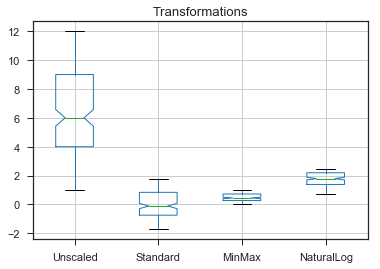

In [85]:
# Create boxplot for transformations to examinbe effect on distribution
boxplot = courses_feature.plot.box(grid=1, notch=1)
boxplot.set_title("Transformations")

**Figure 3b: Scaling Comparisons**

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


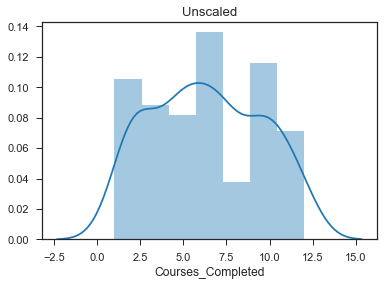

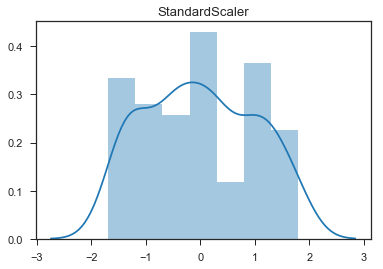

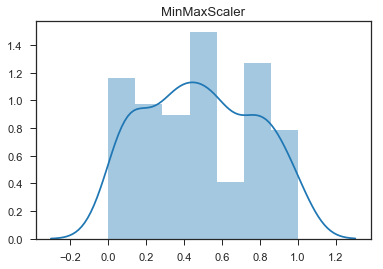

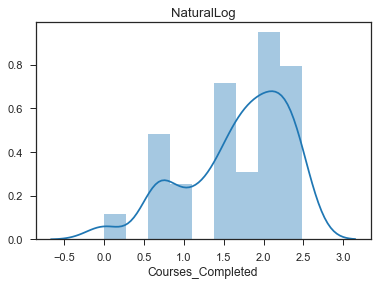

In [86]:
# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')
unscaled_fig.savefig('Transformation-Unscaled' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

standard_fig, ax = plt.subplots()
sns.distplot(X_transformed_standard).set_title('StandardScaler')
standard_fig.savefig('Transformation-StandardScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

minmax_fig, ax = plt.subplots()
sns.distplot(X_transformed_minmax).set_title('MinMaxScaler')
minmax_fig.savefig('Transformation-MinMaxScaler' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
 
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
log_fig.savefig('Transformation-NaturalLog' + '.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)  

# IV. Data Exploration: Software Preferences across Personal, Professional, and Industry Interests/Utility

**Figure 4: Personal Software Preferences - Boxplot**

Text(0.5,1,'Notched Boxplots for Personal Software Preferences')

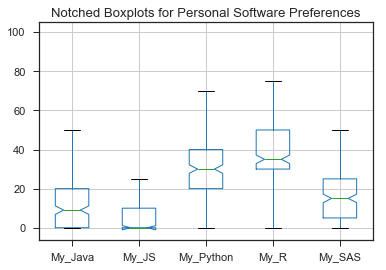

In [87]:
# Create boxplot for personal software preferences 
personal_sw = software_df[['My_Java','My_JS','My_Python','My_R','My_SAS']]
boxplot = personal_sw.plot.box(grid=1, notch=1)
boxplot.set_title("Notched Boxplots for Personal Software Preferences")

**Figure 5: Professional Software Preferences - Boxplot**

Text(0.5,1,'Notched Boxplots for Professional Software Preferences')

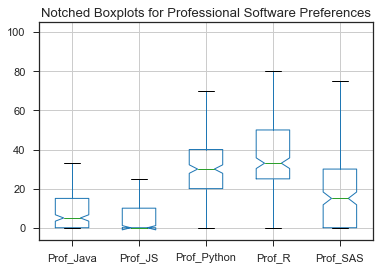

In [88]:
# Create boxplot for professional software preferences 
professional_sw = software_df[['Prof_Java','Prof_JS','Prof_Python','Prof_R','Prof_SAS']]
boxplot = professional_sw.plot.box(grid=1, notch=1)
boxplot.set_title("Notched Boxplots for Professional Software Preferences")

**Figure 6: Industry Software Preferences - Boxplot**

Text(0.5,1,'Notched Boxplots for Industry Software Preferences')

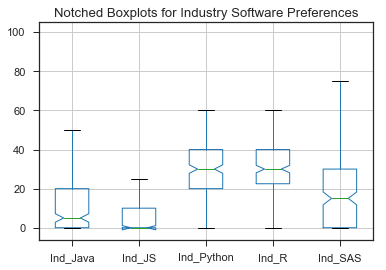

In [89]:
# Create boxplot for industry software preferences 
industry_sw = software_df[['Ind_Java','Ind_JS','Ind_Python','Ind_R','Ind_SAS']]
boxplot = industry_sw.plot.box(grid=1, notch=1)
boxplot.set_title("Notched Boxplots for Industry Software Preferences")

**Figure 7: Personal Software Preferences - Pair Plot**

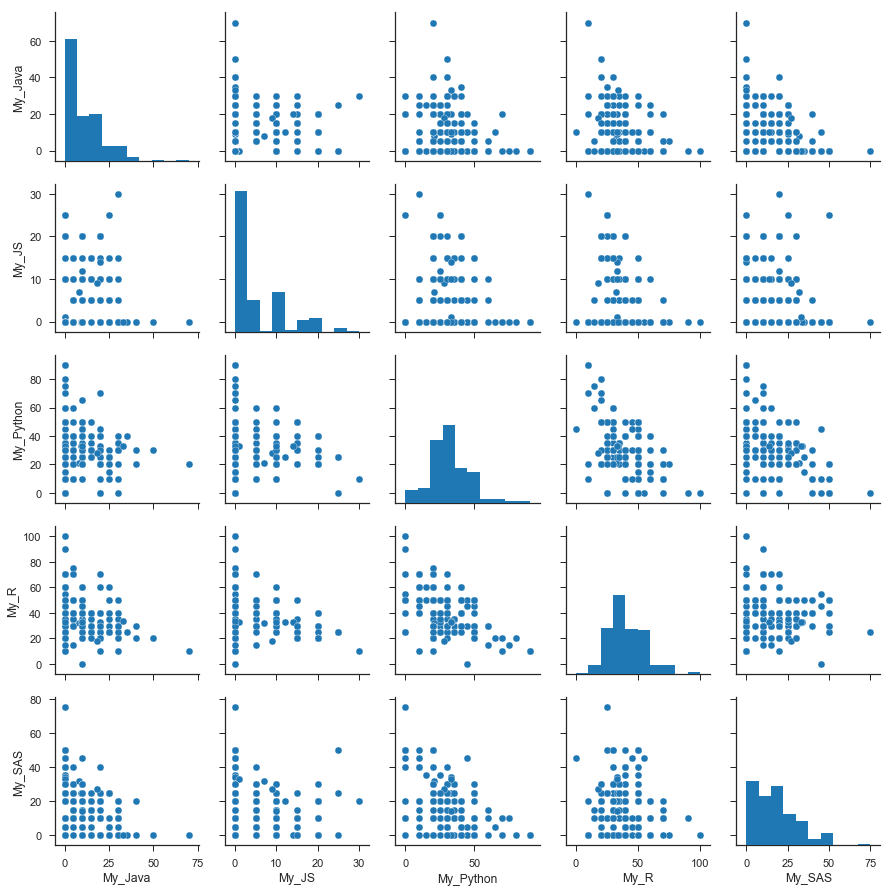

In [90]:
# Create pair plot for personal software preferences
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame
# By default, it also draws the univariate distribution of each variable on the diagonal Axes
sns.pairplot(personal_sw)

**Figure 8 Professional Software Preferences - Pair Plot**

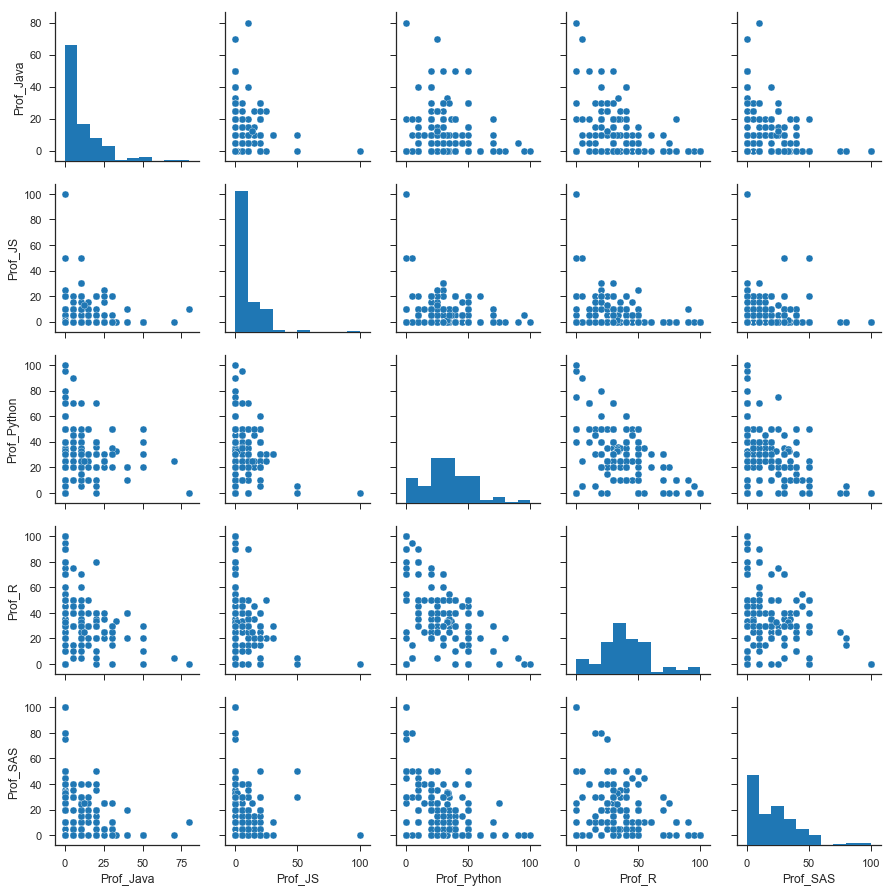

In [91]:
# Create pair plot for professional software preferences
sns.pairplot(professional_sw)

**Figure 9: Industry Software Preferences - Pair Plot**

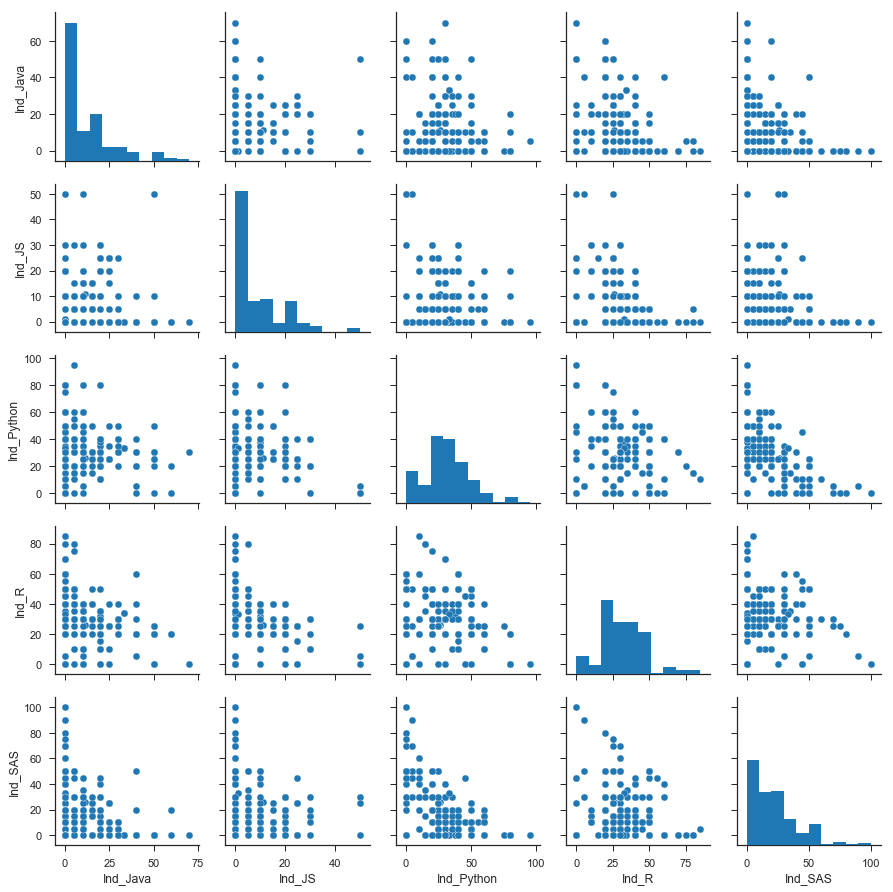

In [92]:
# Create pair plot for industry software preferences
sns.pairplot(industry_sw)

In [93]:
# Define function for correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Software Preferences - Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)  

**Figure 10: Software Preference Correlations Heatmap**

<Figure size 432x288 with 0 Axes>

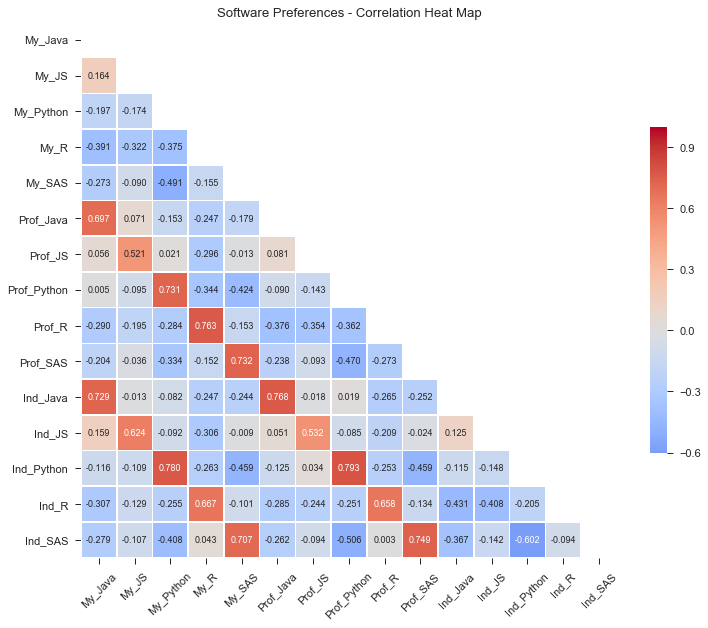

In [94]:
# Examine correlations among software preference features
corr_chart(df_corr = software_df) 

In [95]:
# Create labels for scatterplots
software_df_labels = [
    'Personal Preference for Java/Scala/Spark',
    'Personal Preference for Java/Script/HTML/CSS',
    'Personal Preference for Python',
    'Personal Preference for R',
    'Personal Preference for SAS',
    'Professional Java/Scala/Spark',
    'Professional JavaScript/HTML/CSS',
    'Professional Python',
    'Professional R',
    'Professional SAS',
    'Industry Java/Scala/Spark',
    'Industry Java/Script/HTML/CSS',
    'Industry Python',
    'Industry R',
    'Industry SAS'        
]    

**Figure 11: Software Preference Scatterplots**

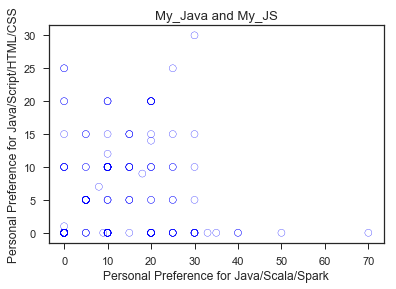

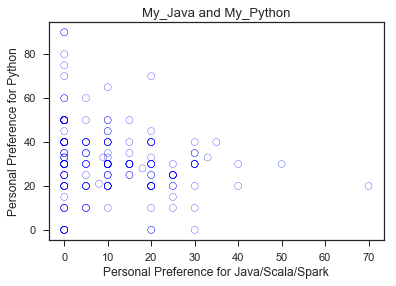

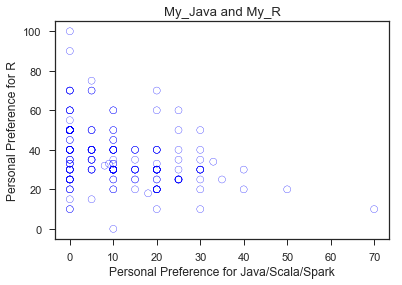

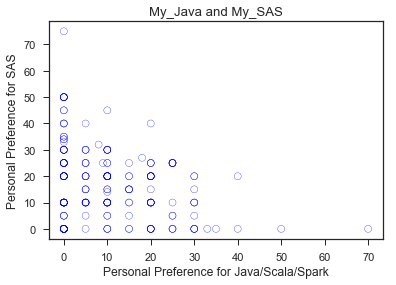

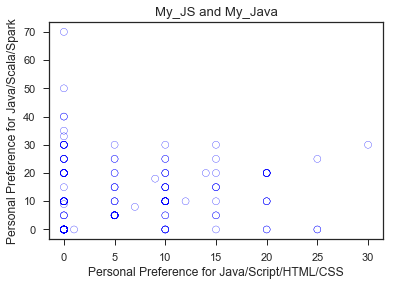

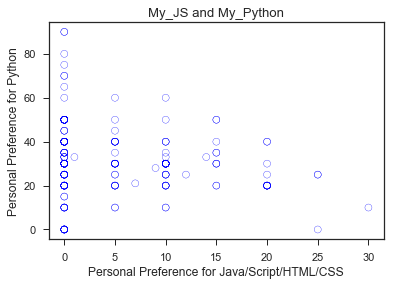

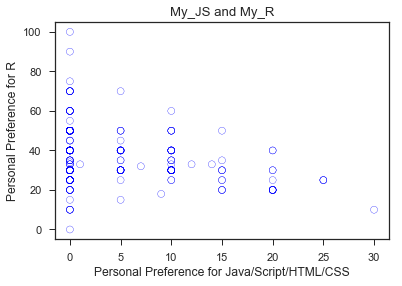

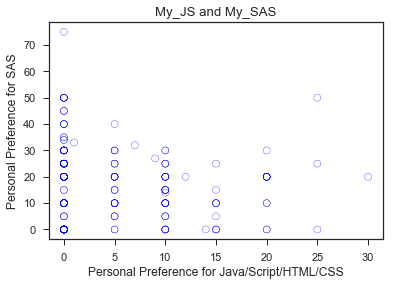

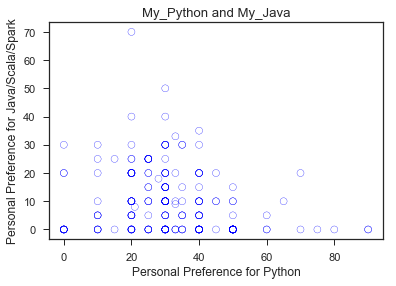

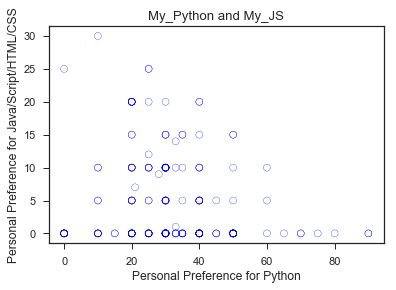

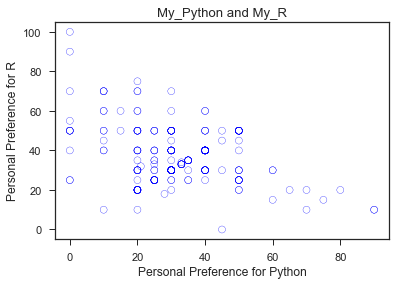

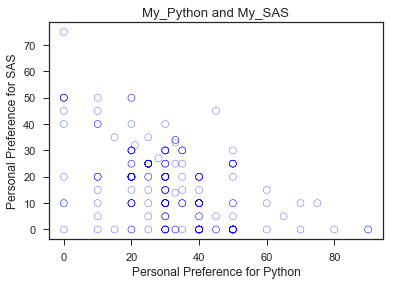

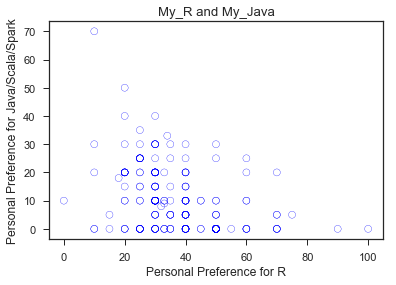

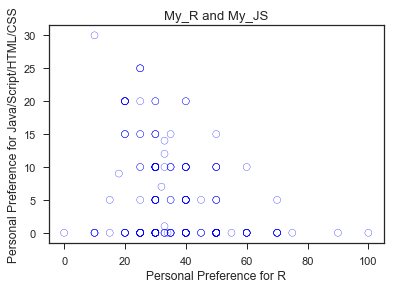

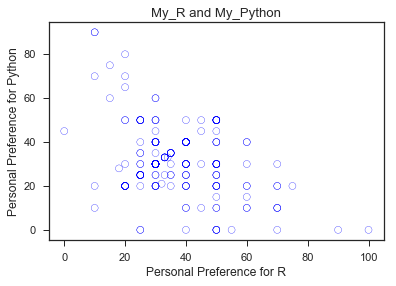

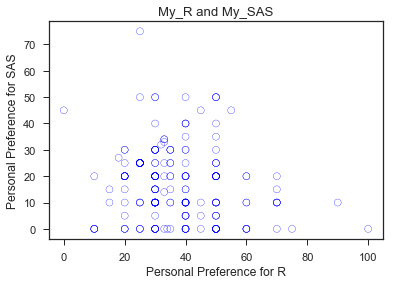

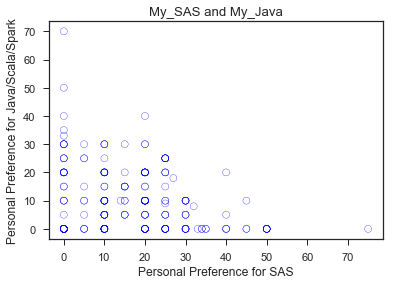

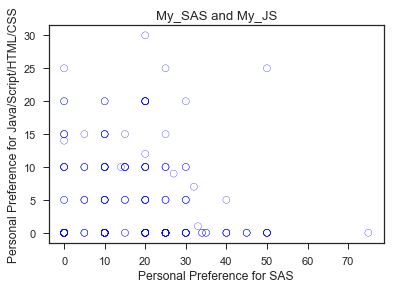

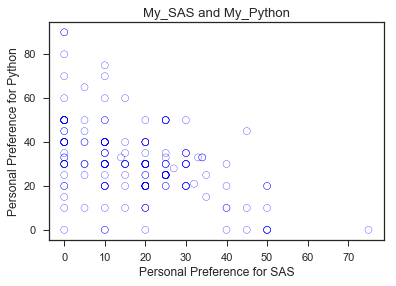

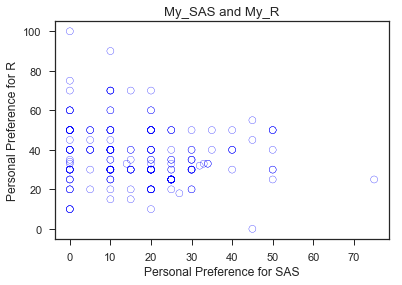

In [96]:
# Create a set of scatter plots for personal software preferences
for i in range(5):
    for j in range(5):
        if i != j:
            file_title = software_df.columns[i] + '_and_' + software_df.columns[j]
            plot_title = software_df.columns[i] + ' and ' + software_df.columns[j]
            fig, axis = plt.subplots()
            axis.set_xlabel(software_df_labels[i])
            axis.set_ylabel(software_df_labels[j])
            plt.title(plot_title)
            scatter_plot = axis.scatter(software_df[software_df.columns[i]], 
            survey_df[software_df.columns[j]],
            facecolors = 'none', 
            edgecolors = 'blue') 
            plt.savefig(file_title + '.pdf', 
                bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
                orientation='portrait', papertype=None, format=None, 
                transparent=True, pad_inches=0.25, frameon=None) 

**Figure 12: Professional Python and SAS Preferences**

Text(0,0.5,'SAS')

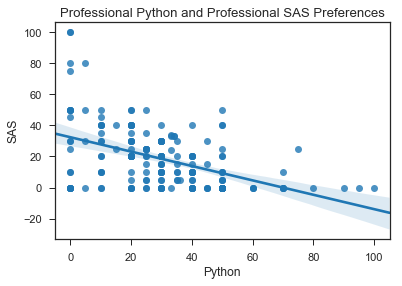

In [97]:
# Create scatterplot of professional Python versus professional SAS preference with regression fit

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# sns.regplot(x=software_df["My_R"], y=software_df["My_Python"], fit_reg=False)
sns.regplot(x=software_df["Prof_Python"], y=software_df["Prof_SAS"])

# Set title
plt.title('Professional Python and Professional SAS Preferences')

# Set x-axis label
plt.xlabel('Python')

# Set y-axis label
plt.ylabel('SAS')

**Figure 13: Industry Python and SAS Preferences**

Text(0,0.5,'SAS')

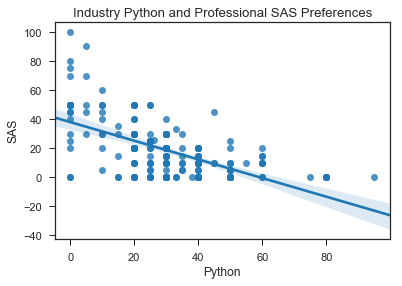

In [98]:
# Create scatterplot of industry Python versus professional SAS preference with regression fit

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# sns.regplot(x=software_df["My_R"], y=software_df["My_Python"], fit_reg=False)
sns.regplot(x=software_df["Ind_Python"], y=software_df["Ind_SAS"])

# Set title
plt.title('Industry Python and Professional SAS Preferences')

# Set x-axis label
plt.xlabel('Python')

# Set y-axis label
plt.ylabel('SAS')

**Figure 14: Joint Plot for Personal Python and R Preferences**

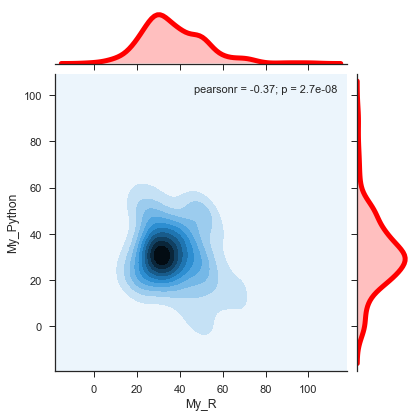

In [99]:
# Create joint plot for Python and R preference correlation
# kde plots a kernel density estimate in the margins and converts the interior into a shaded countour plot
# The histogram on the top shows the distribution of the variable at the x-axis and the histogram to the 
# right shows the distribution of the variable at the y-axis. 
sns.jointplot(x='My_R', 
              y='My_Python', 
              data=software_df, 
              kind="kde", 
              marginal_kws={'lw':5,'color':'red'})

# V. Data Exploration: Course Offering Interests

In [100]:
# Compute descriptive statistics for course interests
interests_df.describe()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest
count,206.000000,200.000000,203.000000,200.000000
mean,73.529126,58.045000,55.201970,53.630000
std,29.835429,32.588079,34.147954,33.539493
min,0.000000,0.000000,0.000000,0.000000
25%,53.000000,29.500000,25.000000,21.500000
50%,82.500000,60.000000,60.000000,51.500000
75%,100.000000,89.250000,85.000000,80.250000
max,100.000000,100.000000,100.000000,100.000000


**Figure 15: Course Interests - Boxplot**

Text(0.5,1,'Notched Boxplots for Level of Interest in New Courses')

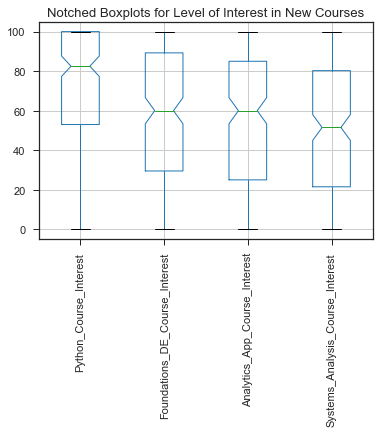

In [101]:
# Create boxplot for course interest data
boxplot = interests_df.plot.box(grid=1, notch=1, rot=90)
boxplot.set_title("Notched Boxplots for Level of Interest in New Courses")

**Figure 16: Course Interests - Correlation Heatmap**

<Figure size 432x288 with 0 Axes>

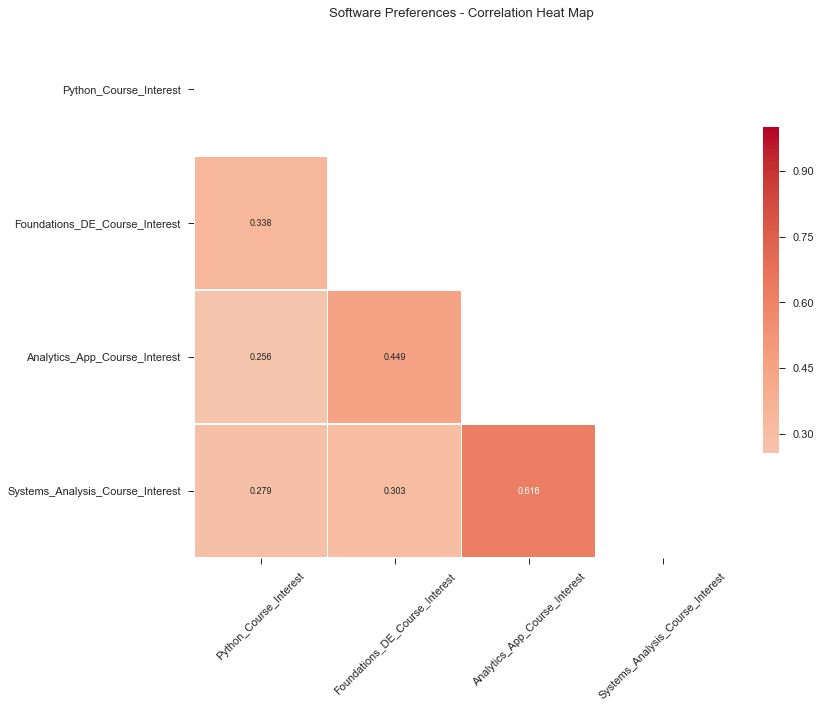

In [102]:
# Examine correlations among software preference features
corr_chart(df_corr = interests_df) 